# Computational Social Science Project #4

## Group number: 4

## Group members: Kamaljit Gill, Madeline Adee, Mingfeng Xue, Qi Jiang


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split

# Make sure to import other libraries that are necessary!

In [ ]:
# when I tried to do this I got the error message "maximum call stack size exceeded", so I just uploaded in the panel on the left and it worked

#import Data from your local computer
#from google.colab import files
#uploaded = files.upload()

#It will prompt you to select a file. Click on “Choose Files” then select and upload the file. Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# See this webpage if you find issues uploading the data: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92#:~:text=Click%20on%20%E2%80%9CChoose%20Files%E2%80%9D%20then,name%20of%20the%20uploaded%20file).

In [ ]:
#import io
# nhanes = pd.read_csv(io.BytesIO(uploaded['nhanes.csv']))
nhanes = pd.read_csv('nhanes.csv')


In [ ]:
# Get the ID numbers for each observation (seqn)
seqn = nhanes['SEQN']
# Get the target, "self-reported health condition," HSD010
hsd010 = nhanes['HSD010']
# Drop SEQN from the dataframe and then apply the standard scaler
nhanes = nhanes.drop(['SEQN', 'HSD010'], axis = 1)
nhanes_scaled = pd.DataFrame(StandardScaler().fit_transform(nhanes),
                             columns = nhanes.columns)
# Add the ID and target back in
nhanes_scaled['SEQN'] = seqn
nhanes_scaled['HSD010'] = hsd010
nhanes_scaled = nhanes_scaled.set_index('SEQN')
nhanes_scaled.head()


,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,...,OHQ770,OHQ845,PAAQUEX,SMQ860,SMQ870,SMQ872,SMQ874,SMQ878,SMAQUEX.x,HSD010
SEQN,,,,,,,,,,,,,,,,,,,,,
73568,0.0,2.034312,0.0,0.324834,-0.393906,1.085853,-0.194202,-0.057306,0.128246,-0.189513,...,0.383802,-0.646584,-0.484200,1.125008,0.0,-2.081666,1.087115,1.463404,0.612440,1
73576,0.0,0.261930,0.0,-3.078499,0.568251,0.634362,-0.194202,-0.057306,0.128246,0.080373,...,0.383802,-1.539259,-0.484200,1.125008,0.0,-2.081666,1.087115,-0.683338,-1.632812,1
73579,0.0,0.728346,0.0,0.324834,1.530407,-1.623092,-0.194202,-0.057306,0.128246,-0.189513,...,0.383802,-1.539259,2.065262,-0.888883,0.0,0.480384,-0.919866,-0.683338,-1.632812,2
73581,0.0,-0.857470,0.0,0.324834,0.480782,1.085853,-0.194202,-0.057306,0.128246,0.080373,...,0.383802,-0.646584,-0.484200,1.125008,0.0,0.480384,-0.919866,-0.683338,0.612440,2
73584,0.0,0.495138,0.0,0.324834,0.305844,-1.623092,-0.194202,-0.057306,0.128246,0.080373,...,-2.605509,0.246091,2.065262,1.125008,0.0,0.480384,-0.919866,1.463404,-1.632812,3


## Plots

Let's take a look at the data. Below we visualize boxplots of family income to federal poverty line ratio ('INDFMPIR') and self-reported health condition. Notice how there are some clear patterns (the lower the ratio, the lower reported health condition), but it's not a perfect separation. We have 240+ features in our dataset, and we likely have several features in our dataset that highly correlate with our family income-poverty line ratio measure - PCA will help us simplify these.

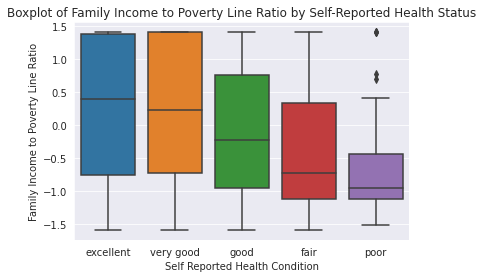

In [ ]:
# Create a binary version of hsd010 where 1-3 are "good" and 4-5 are "poor"
nhanes_scaled['HSD010_binary'] = hsd010_binary = nhanes_scaled['HSD010'].replace(
    [1, 2, 3, 4, 5], ['good', 'good', 'good', 'poor', 'poor']) 
# Recode the original hsd010 with the string labels
nhanes_scaled['HSD010'] = nhanes_scaled['HSD010'].replace(
    [1, 2, 3, 4, 5], ['excellent', 'very good', 'good', 'fair', 'poor'])
# Boxplot of hsd010
ax = sns.boxplot(x = 'HSD010', y = 'INDFMPIR', data = nhanes_scaled)
ax.set(xlabel = "Self Reported Health Condition",
      ylabel = "Family Income to Poverty Line Ratio")
ax.set_title("Boxplot of Family Income to Poverty Line Ratio by Self-Reported Health Status")
plt.show()

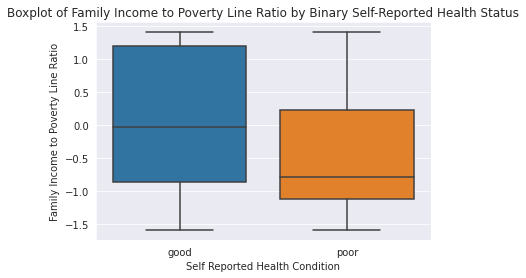

In [ ]:
# Boxplot of hsd010_binary
ax = sns.boxplot(x = 'HSD010_binary', y = 'INDFMPIR', data = nhanes_scaled)
ax.set(xlabel = "Self Reported Health Condition",
      ylabel = "Family Income to Poverty Line Ratio")
ax.set_title("Boxplot of Family Income to Poverty Line Ratio by Binary Self-Reported Health Status")
plt.show()

Family income also is not necessarily well correlated with measured health outcomes. See below where we look at the relationship between Body Mass Index (BMI) and the family income-poverty line ratio, and shade points by self-reported health condition. It's hard to find a clear pattern - this is where clustering may come in handy.

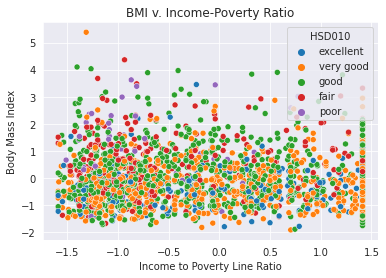

In [ ]:
ax = sns.scatterplot(x = "INDFMPIR", y = "BMXBMI", hue = "HSD010", palette = "tab10", data = nhanes_scaled)
ax.set(xlabel = "Income to Poverty Line Ratio",
      ylabel = "Body Mass Index")
ax.set_title("BMI v. Income-Poverty Ratio")
plt.show()

Before we move to working on unsupervised methods, we'll drop our target variables again:

In [ ]:
nhanes_scaled_scatter = nhanes_scaled.drop(['HSD010'], axis = 1)
nhanes_scaled = nhanes_scaled.drop(['HSD010', 'HSD010_binary'], axis = 1)

## 3 Principal Component Analysis

Conduct a Principal Component Analysis (PCA) of the nhanes data. The data has already been prepared for you, so you can work directly on nhanes_scaled. Be sure to do the following:

- Choose the number of components and provide 1-2 sentences about your choice of the number of components. 
- Plot a barplot of the variation explained by each component. *Hint*: look at the attributes associated with your model. 
- Choose how many components you will use to fit a supervised learning model and provide 1-2 sentences to explain that choice.
- Plot a 2D scatterplot of the first two components and provide 1-2 sentences analyzing the plot.

### Train PCA and Discuss Number of Components

In [ ]:
nhanes_scaled.shape

(2064, 241)

The dataset has 240 features, and we will choose 50 principal components (slightly over one fifth of the number of feature) to train PCA, in order to have the combined components safely able to explain a significant amount of variations of the original dataset. In the later step, we will include fewer components in the analysis, and the number of components included in the supervised learning model will depend on how each component performs to explain the variations. 

In [ ]:
pca = PCA(n_components=50)
pca_nhanes = pca.fit_transform(nhanes_scaled)

In [ ]:
pca_df = pd.DataFrame(data=pca_nhanes
                      , columns=['pc1', 'pc2', 'pc3','pc4', 'pc5', 'pc6','pc7', 'pc8', 'pc9','pc10',
                               'pc11', 'pc12', 'pc13','pc14', 'pc15', 'pc16','pc17', 'pc18', 'pc19','pc20',
                               'pc21', 'pc22', 'pc23','pc24', 'pc25', 'pc26','pc27', 'pc28', 'pc29','pc30',
                                'pc31', 'pc32', 'pc33','pc34', 'pc35', 'pc36','pc37', 'pc38', 'pc39','pc40',
                               'pc41', 'pc42', 'pc43','pc44', 'pc45', 'pc46','pc47', 'pc48', 'pc49','pc50'])
pca_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc41,pc42,pc43,pc44,pc45,pc46,pc47,pc48,pc49,pc50
0,9.527813,-0.816232,-1.867163,-2.109618,-3.929896,-0.191581,-3.840110,-2.933815,1.512458,0.675749,...,1.842532,-0.203063,1.012128,0.152682,0.562241,-0.790151,-0.562710,-1.124988,-0.247735,-1.032237
1,-5.838344,-3.692618,3.805455,-1.027956,0.391921,1.594873,2.693164,-0.741404,0.390608,-2.394550,...,-1.718022,-1.724588,1.587878,-0.962389,3.450863,-0.808095,-1.514909,-0.754654,2.193952,1.217588
2,-0.719457,-2.573193,0.907938,-4.755903,-1.797585,0.860263,-1.017846,0.639277,0.538178,0.441668,...,0.471976,0.026558,0.131977,0.420248,-0.340900,-0.410810,-0.318198,-0.064258,-0.654711,-1.267792
3,3.533627,-2.576975,-3.249187,-0.404917,3.999982,1.442708,-1.180494,0.328049,-4.155094,-1.246511,...,-0.628688,0.735947,-0.334442,0.625688,-0.049541,-0.631449,-0.188165,0.779091,-0.461117,0.243667
4,-6.872095,-4.194231,0.886693,-0.848189,-0.523156,0.072638,0.846349,0.985821,0.548432,-0.053233,...,0.247690,-0.441808,0.042660,-0.386327,-1.061220,1.264510,0.170193,1.514699,-0.368191,-1.776759


### Barplot of Components

In [ ]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

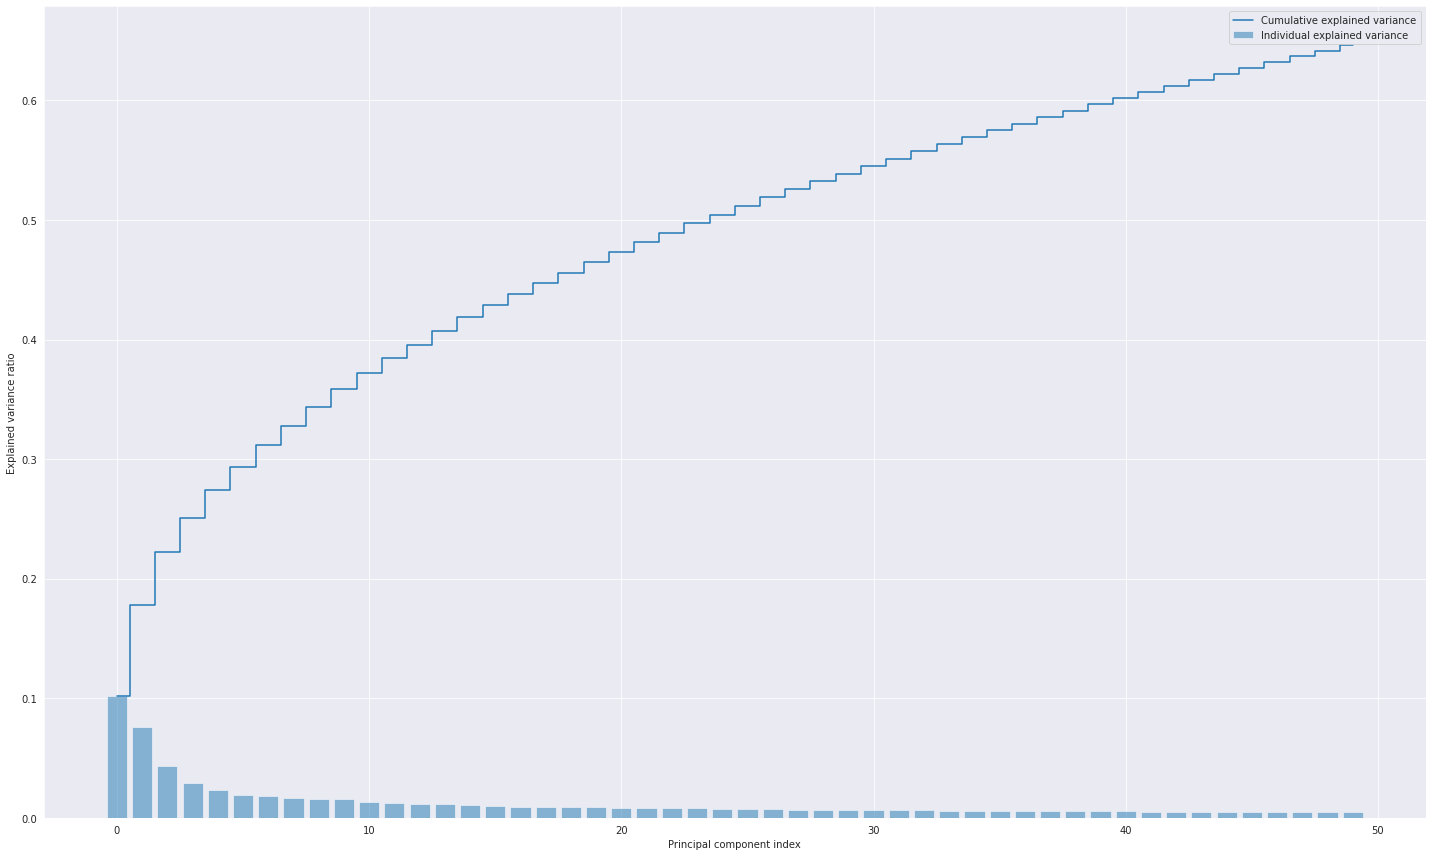

In [ ]:
plt.figure(figsize = (20, 12))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### How many components will you use to fit a supervised learning model?

According to the above barplot, the first forty components already explained 60% of the variances; moreover, the variances explained by the components after the 40th are neglectable. Therefore, we will use the first forty components to fit a supervised learning model.

### 2D Scatterplot of the first two components

In [ ]:
nhanes_scaled_scatter.reset_index(inplace=True)

<Figure size 432x288 with 0 Axes>

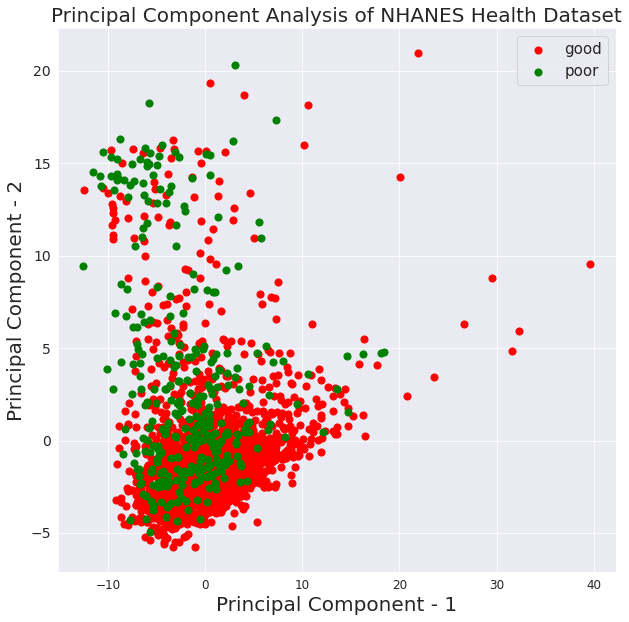

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of NHANES Health Dataset",fontsize=20)
targets = ['good', 'poor']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = nhanes_scaled_scatter['HSD010_binary'] == target
    plt.scatter(pca_df.loc[indicesToKeep, 'pc1']
               , pca_df.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()


Combining the first and second principal components couldn't classify the health condition well. This is because those two components can only explain less than 20% of the variations of the original dataset. We should include more pricinpal components in prediciting health conditions. 

## Clustering


- Choose a clustering algorithm and explain it in 1-2 sentences.
- Cluster the nhanes data. Detail any choice you need to make with regards to number of clusters, and how you arrived at that choice. For instance, you might use the [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering) if you choose k-means.
- Plot your clusters on top of BMI v. Income Poverty Ratio Plot. Describe what you see in 1-2 sentences.
- Retrain the clustering algorithm, but this time use your PCA results instead of the original dataframe. Plot the clusters on top of the 2D PCA scatterplot from the previous step. Describe your results in 1-2 sentences.

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Choose a Clustering Algorithm

We went with k-means clustering. K-means clustering is a partitional clustering algorithm, which works by partitioning the data so that data within a cluster is a similar as possible, and as different as possible from other clusters. Each cluster is represented by a centroid. 

### Cluster nhanes

In [ ]:
kmeans = KMeans(n_clusters=3,
               max_iter=300,  #default
               algorithm="auto" #default
               )

kmeans.fit(nhanes_scaled)

KMeans(n_clusters=3)

In [ ]:
kmeans_kwargs = {
    "init": 'k-means++',
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    "algorithm": "auto",
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(nhanes_scaled)
    sse.append(kmeans.inertia_)

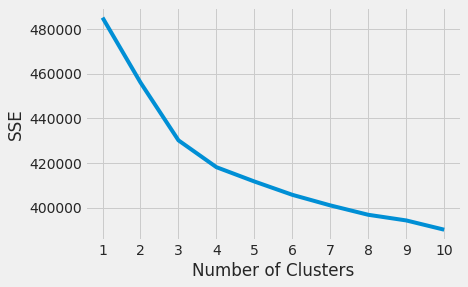

In [ ]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

Based on this plot above, using the "elbow method", we are going to use 4 for the number of clusters. 

In [ ]:
kmeans2 = KMeans(n_clusters=4,
               max_iter=300, #default 
               algorithm = "auto", 
               init = 'k-means++'
               )

kmeans2.fit(nhanes_scaled)

KMeans(n_clusters=4)

### Plot your clusters on top of the BMI v. Income Poverty Ratio Plot

In [ ]:
# doing it this way to be able to match plot from lab
X = nhanes_scaled[['INDFMPIR', 'BMXBMI']].to_numpy()

X

array([[ 1.41221429, -1.00197156],
       [-0.64201717, -0.61878288],
       [ 0.19288976, -1.63621489],
       ...,
       [-1.59104808,  1.50857496],
       [ 0.5893204 , -0.49986226],
       [ 1.41221429, -0.30166122]])

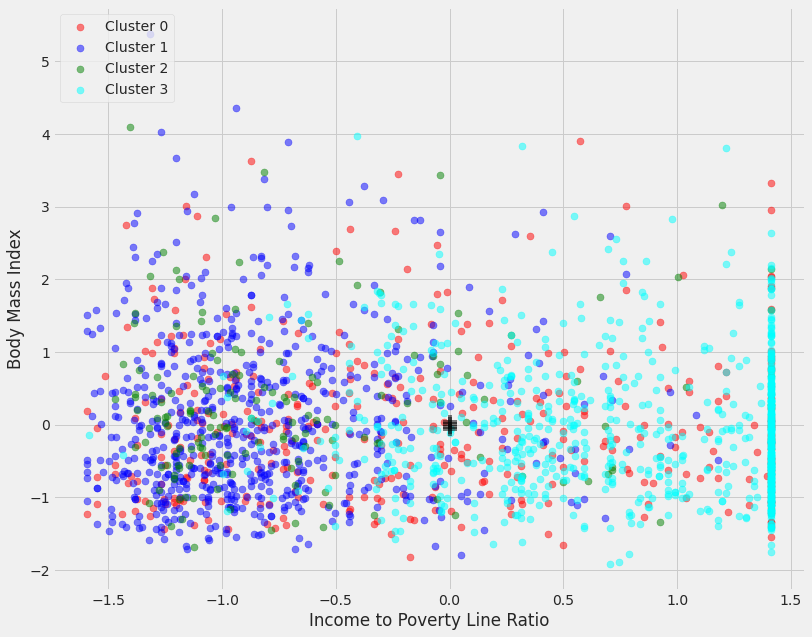

In [ ]:
plt.rcParams['figure.figsize'] = [12,10]
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(*X[kmeans2.labels_==0,:].T, s=50, c='r', label='Cluster 0', alpha=0.5)
ax1.scatter(*X[kmeans2.labels_==1,:].T, s=50, c='b', label='Cluster 1', alpha=0.5)
ax1.scatter(*X[kmeans2.labels_==2,:].T, s=50, c='g', label='Cluster 2', alpha=0.5)
ax1.scatter(*X[kmeans2.labels_==3,:].T, s=50, c='cyan', label='Cluster 3', alpha=0.5)
centers = kmeans2.cluster_centers_
ax1.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='+',alpha=0.5);
plt.legend(loc='upper left')
plt.xlabel("Income to Poverty Line Ratio")
plt.ylabel("Body Mass Index")
plt.show()

For the full dataset, k-means clustering does not work so well - likely do to the fact that k-means clustering does not deal with noise in the data as well as other clustering algorithms. 

### Retrain the clustering algorithm on PCA components and plot clusters on your 2D scatter

In [ ]:
kmeans3 = KMeans(n_clusters=4,
               max_iter=300, #default 
               algorithm = "auto", 
               init = 'k-means++'
               )


kmeans3.fit(pca_df)

KMeans(n_clusters=4)

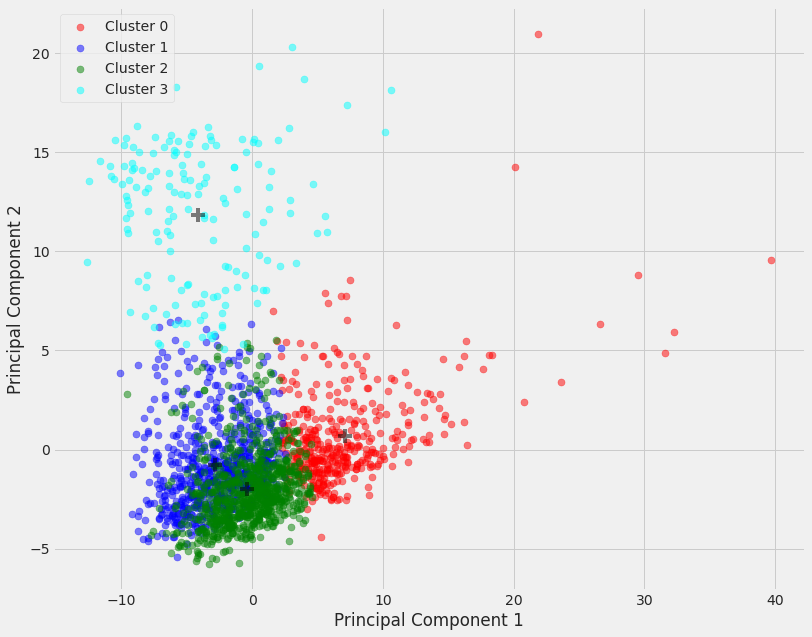

In [ ]:
# doing it this way to be able to match plot from lab
X = pca_df[['pc1', 'pc2']].to_numpy()

plt.rcParams['figure.figsize'] = [12,10]
fig = plt.figure()
ax2 = fig.add_subplot(111)

ax2.scatter(*X[kmeans3.labels_==0,:].T, s=50, c='r', label='Cluster 0', alpha=0.5)
ax2.scatter(*X[kmeans3.labels_==1,:].T, s=50, c='b', label='Cluster 1', alpha=0.5)
ax2.scatter(*X[kmeans3.labels_==2,:].T, s=50, c='g', label='Cluster 2', alpha=0.5)
ax2.scatter(*X[kmeans3.labels_==3,:].T, s=50, c='cyan', label='Cluster 3', alpha=0.5)
centers = kmeans3.cluster_centers_
ax2.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='+',alpha=0.5);
plt.legend(loc='upper left')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Now that we've reduced the dimensions of the dataset, the k-means algorithm is retrained and we can visualize distinct clusters with centers that are not all in the same location like the previous k-means clustering. 

## Neural Network

Now we are ready to predict! Do the following:

- Choose either HSD010 or HSD010\_binary as your target outcome.  
- Train a neural network using the original features. Much of the code to train a basic neural net has been set up for you, but you will need to fill in a couple of missing pieces.
- Train a neural network using only your PCA components as features.
- Train a neural network using your PCA components and the predicted class membership from your clustering algorithm as features.
- Compare and contrast how well each algorithm did. Which featurization technique would you pick and why?

Below we provide a template for training a neural network. Use this template for training on the original features, on the PCA components, and the PCA components + the predicted classes from your clusters.

### Neural Network on Original Features

In [ ]:
y = np.where(hsd010_binary=='good',1,0) # either hsd010 or hsd010_binary, may need to convert to numeric if it isn't already 
X = nhanes_scaled # drop out any columns that aren't features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 10)

In [ ]:
#import keras
#from keras.utils import np_utils 

#num_classes = 2
# convert class vectors to binary class matrices
#y_train = np_utils.to_categorical(y_train,num_classes)
#y_test = np_utils.to_categorical(y_test,num_classes)
#num_classes = y_test.shape[1]

In [ ]:
X.shape

(2064, 241)

In [ ]:
model = Sequential()

model.add(
    Dense(128, input_dim= 241, kernel_initializer= 'random_normal', activation= 'relu')
)

model.add(
    Dense(64)
)

model.add(
    Dense(32)
)

model.add(
    Dense(12)
)

model.add(
    Dense(1,activation='sigmoid')
)
## Add any additional layers you wish here

model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=200, verbose=True)

Epoch 1/25
8/8 [==============================] - 1s 33ms/step - loss: 0.4925 - accuracy: 0.7797 - val_loss: 0.4067 - val_accuracy: 0.8469
Epoch 2/25
8/8 [==============================] - 0s 7ms/step - loss: 0.3702 - accuracy: 0.8547 - val_loss: 0.3773 - val_accuracy: 0.8469
Epoch 3/25
8/8 [==============================] - 0s 7ms/step - loss: 0.3122 - accuracy: 0.8740 - val_loss: 0.3546 - val_accuracy: 0.8527
Epoch 4/25
8/8 [==============================] - 0s 7ms/step - loss: 0.2797 - accuracy: 0.8902 - val_loss: 0.3448 - val_accuracy: 0.8547
Epoch 5/25
8/8 [==============================] - 0s 7ms/step - loss: 0.2433 - accuracy: 0.9018 - val_loss: 0.3504 - val_accuracy: 0.8527
Epoch 6/25
8/8 [==============================] - 0s 7ms/step - loss: 0.2091 - accuracy: 0.9102 - val_loss: 0.3547 - val_accuracy: 0.8585
Epoch 7/25
8/8 [==============================] - 0s 9ms/step - loss: 0.1734 - accuracy: 0.9341 - val_loss: 0.3673 - val_accuracy: 0.8547
Epoch 8/25
8/8 [=================

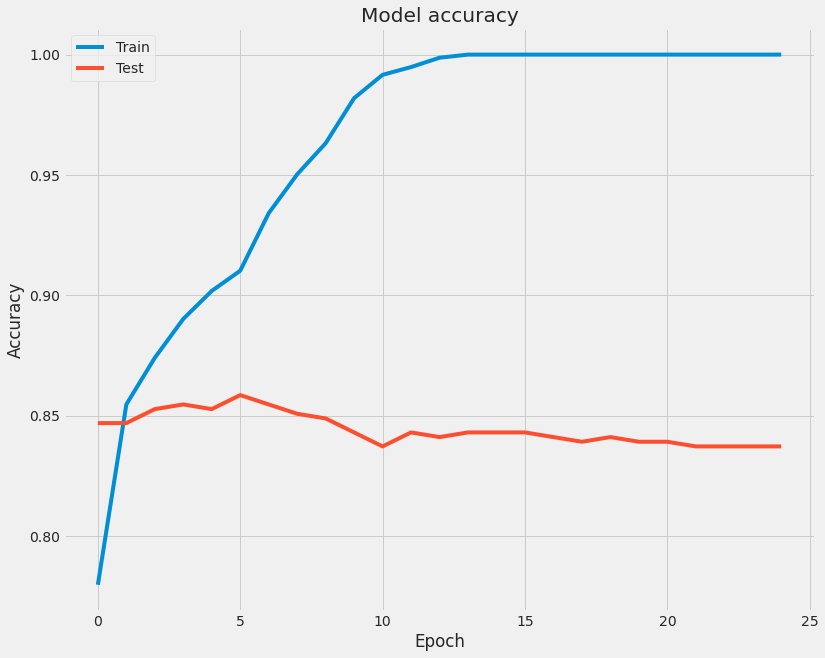

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Neural Network on Principal Components

In [ ]:
y = np.where(hsd010_binary=='good',1,0) # either hsd010 or hsd010_binary, may need to convert to numeric if it isn't already 
X = pca_df # drop out any columns that aren't features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 10)


In [ ]:
X.shape

(2064, 50)

In [ ]:
model = Sequential()

model.add(
    Dense(128, input_dim= 50, kernel_initializer= 'random_normal', activation= 'relu')
)

model.add(
    Dense(64)
)

model.add(
    Dense(32)
)

model.add(
    Dense(12)
)

model.add(
    Dense(1,activation='sigmoid')
)
## Add any additional layers you wish here

model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=200, verbose=True)

Epoch 1/25
8/8 [==============================] - 1s 26ms/step - loss: 0.6041 - accuracy: 0.7222 - val_loss: 0.3996 - val_accuracy: 0.8488
Epoch 2/25
8/8 [==============================] - 0s 5ms/step - loss: 0.3619 - accuracy: 0.8559 - val_loss: 0.3682 - val_accuracy: 0.8585
Epoch 3/25
8/8 [==============================] - 0s 6ms/step - loss: 0.3293 - accuracy: 0.8630 - val_loss: 0.3559 - val_accuracy: 0.8566
Epoch 4/25
8/8 [==============================] - 0s 7ms/step - loss: 0.3009 - accuracy: 0.8747 - val_loss: 0.3574 - val_accuracy: 0.8624
Epoch 5/25
8/8 [==============================] - 0s 6ms/step - loss: 0.2895 - accuracy: 0.8805 - val_loss: 0.3602 - val_accuracy: 0.8566
Epoch 6/25
8/8 [==============================] - 0s 5ms/step - loss: 0.2749 - accuracy: 0.8863 - val_loss: 0.3630 - val_accuracy: 0.8585
Epoch 7/25
8/8 [==============================] - 0s 5ms/step - loss: 0.2630 - accuracy: 0.8934 - val_loss: 0.3695 - val_accuracy: 0.8508
Epoch 8/25
8/8 [=================

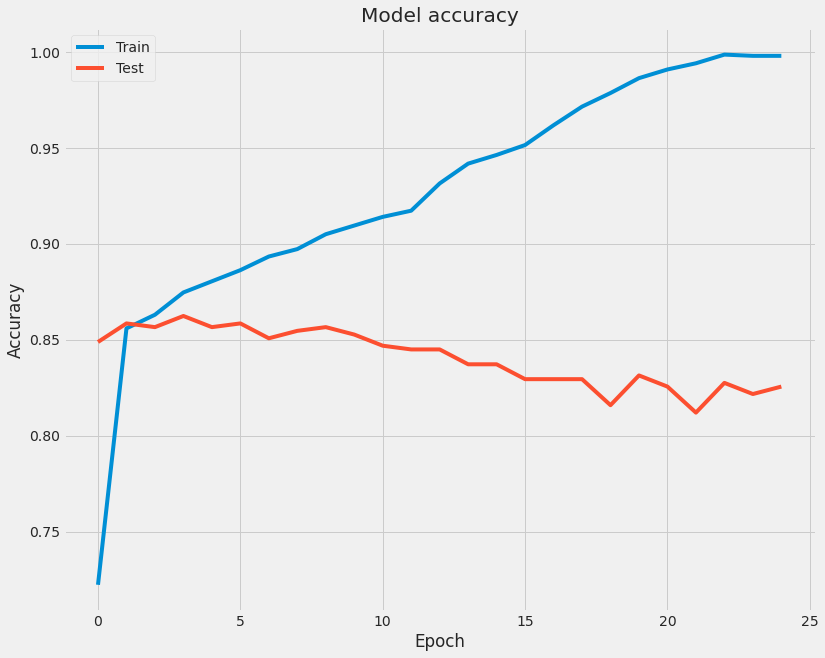

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Neural Network on Principal Components + Cluster Membership

In [ ]:
kmeans3.labels_.astype(object)

array([0, 1, 2, ..., 1, 0, 2], dtype=object)

In [ ]:
pca_km_df=pca_df
pca_km_df['kmn']=kmeans3.labels_.astype(object)
pca_km_df = pd.get_dummies(pca_km_df)

In [ ]:
y = np.where(hsd010_binary=='good',1,0) # either hsd010 or hsd010_binary, may need to convert to numeric if it isn't already 
X = pca_km_df # drop out any columns that aren't features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 10)


In [ ]:
X.shape

(2064, 54)

In [ ]:
model = Sequential()

model.add(
    Dense(128, input_dim= 54, kernel_initializer= 'random_normal', activation= 'relu')
)

model.add(
    Dense(64)
)

model.add(
    Dense(32)
)

model.add(
    Dense(12)
)

model.add(
    Dense(1,activation='sigmoid')
)
## Add any additional layers you wish here

model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=200, verbose=True)

Epoch 1/25
8/8 [==============================] - 1s 23ms/step - loss: 0.6793 - accuracy: 0.6408 - val_loss: 0.4800 - val_accuracy: 0.8488
Epoch 2/25
8/8 [==============================] - 0s 7ms/step - loss: 0.4182 - accuracy: 0.8482 - val_loss: 0.3886 - val_accuracy: 0.8547
Epoch 3/25
8/8 [==============================] - 0s 6ms/step - loss: 0.3442 - accuracy: 0.8676 - val_loss: 0.3877 - val_accuracy: 0.8450
Epoch 4/25
8/8 [==============================] - 0s 6ms/step - loss: 0.3192 - accuracy: 0.8734 - val_loss: 0.3634 - val_accuracy: 0.8624
Epoch 5/25
8/8 [==============================] - 0s 6ms/step - loss: 0.2972 - accuracy: 0.8837 - val_loss: 0.3639 - val_accuracy: 0.8682
Epoch 6/25
8/8 [==============================] - 0s 7ms/step - loss: 0.2871 - accuracy: 0.8870 - val_loss: 0.3633 - val_accuracy: 0.8702
Epoch 7/25
8/8 [==============================] - 0s 7ms/step - loss: 0.2775 - accuracy: 0.8902 - val_loss: 0.3670 - val_accuracy: 0.8605
Epoch 8/25
8/8 [=================

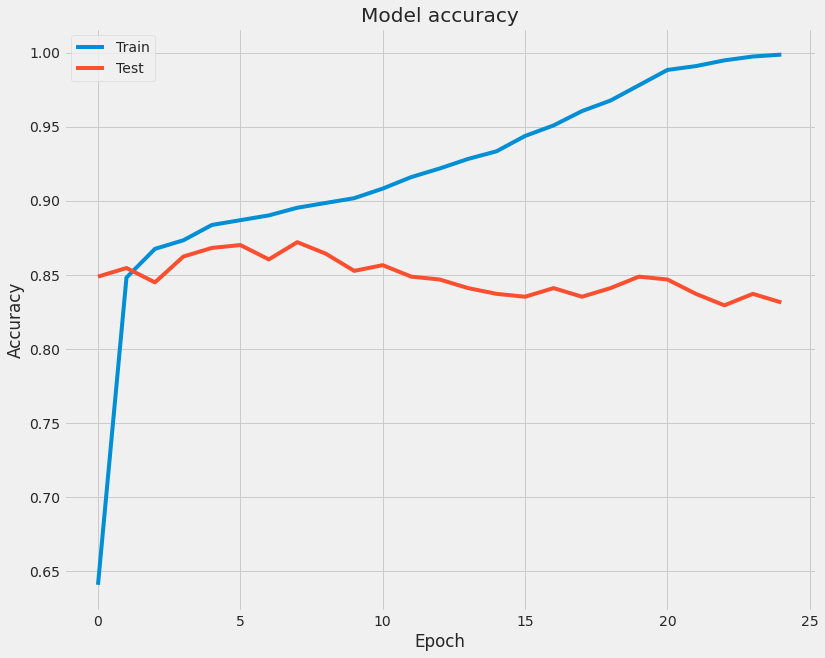

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Answer:** The neural network model using all standardized data produced the best result as the accuracy of test data remains stable at 0.85. The neural network model with feathures pre-processed via PCA or in conjunction with membership produced by Kmeans got worse results as accuracy became. stable below 0.825. Therefore, in terms of accuracy, I would choose all standardized data as the features in the neural network model.

## Discussion Questions

###1. In your own words, what is the difference between PCA and clustering?


Principal component analysis and clustering are both used in unsupervised learning. PCA allows for summarization of correlated variables/features into smaller numbers of representative variables that explain the variability in the original dataset. PCA is also a tool that can be used to visualize the variables or observations computed from principal components. Clustering allows us to find subgroups in which the observations are similar to each other, but the groups are different from one another. 




### 2. Did you notice any advantages to combining PCA and clustering? If so, what do you think they were? If not, why do you think you didn't see any gains from this combination?

Yes, we did notice the advantages to combining PCA and clustering. By combining the two methods its shows a further improvement in our model and where in the only k-means clustering model there were multiple clusters in one location, the addition of PCA in the second model allows us to visualize distinct clusters with centers that are not all in the same location. 

Combining features pre-processed by PCA and Kmeans, we can see the accuracy increases as compared to only used PCA or Kmeans features, which indicates that either PCA or Kmeans features can retain unique information of the raw data so they complete each other to some extent. Moreover, in comparision to raw data, combining PCA and clustering can reduce the complexity of the model as only 50 PCA components and one membership category were used.





### 3. How can unsupervised techniques help with downstream supervised learning tasks when working with "big data?"

Unsupervised techniques can help discover subgroups and patterns that may not be apparent in raw dataset, such as the Kmeans membership.  

One big helps of unsupervised techniques in downstream supervised learning tasks lies in the reduction of number of features without lossing too much information. For example, in the raw data, there are 240 features but after the PCA engineering, 50 features already explain more than 60% of the variance.
